In [1]:
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

from PIL import Image
import requests
from io import BytesIO

import pickle

In [2]:
pickle_in = open("C:/Users/tring/Desktop/SSENSE Project/feature engineering/ssense_rec_df.pickle","rb")

data = pickle.load(pickle_in)

In [3]:
data.head()

,sku,accessories,backpacks,bags,bars,beanies,belts,biker,blankets,blazers,...,UNI,XL,XL/XXL,XS,XS/S,XXL,XXS,XXXL,full-price,sale-price
0,201014M138001,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,5.872118,5.872118
1,201422M138012,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,4.828314,4.828314
2,201422M138013,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,4.828314,4.828314
3,201168M170261,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,6.040255,6.040255
4,201168M145213,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,6.453625,6.453625


In [4]:
product_df = pd.read_csv('C:/Users/tring/Desktop/SSENSE Project/eda/all_info.csv', sep = '|', header = 0)

product_df.head()

,creation-date,sub-category,brand,name,sku,description,origin,composition,full-price,sale-price,discount-percent,remaining-sizes,image
0,2019-12-18,beanies,The Elder Statesman,Black Short Bunny Echo Beanie,201014M138001,Rib knit cashmere beanie in black. Rolled brim...,United States,100% cashmere.,355,355,0,['UNI'],https://img.ssensemedia.com/images/201014M1380...
1,2019-12-18,beanies,PS by Paul Smith,Red Wool Zebra Beanie,201422M138012,Rib knit lambswool beanie in red. Signature gr...,United Kingdom,100% lambswool.,125,125,0,['UNI'],https://img.ssensemedia.com/images/201422M1380...
2,2019-12-18,beanies,PS by Paul Smith,Black Wool Zebra Beanie,201422M138013,Rib knit lambswool beanie in navy. Signature g...,United Kingdom,100% lambswool.,125,125,0,['UNI'],https://img.ssensemedia.com/images/201422M1380...
3,2019-12-18,iphone cases,Maison Margiela,Black Pouch iPhone Case,201168M170261,Grained leather shoulder bag-style iPhone case...,Italy,Leather.,420,420,0,['UNI'],https://img.ssensemedia.com/images/201168M1702...
4,2019-12-18,necklaces,Maison Margiela,Silver Key Necklace,201168M145213,Curb chain necklace in sterling silver. Logo a...,Italy,925 sterling silver.,635,635,0,['UNI'],https://img.ssensemedia.com/images/201168M1452...


## 1/ COSINE SIMILARITY

Cosine similarity calculates similarity by measuring the cosine of angle between two vectors, in this case a vector containing data on the engineered features of a product.

Two identical products are expected to have a cosine similarity score of 1. The closer to 1, the better match a product is for a given input product.

In [5]:
product_matrix = data.copy()
product_matrix = product_matrix.drop(['sku'],axis = 1)

cosine_sim = cosine_similarity(product_matrix)

In [6]:
print(cosine_sim)

[[1.         0.93459156 0.9505322  ... 0.91793396 0.91830139 0.91998164]
 [0.93459156 1.         0.98097006 ... 0.88841305 0.89017055 0.90517694]
 [0.9505322  0.98097006 1.         ... 0.9035302  0.90358773 0.90519592]
 ...
 [0.91793396 0.88841305 0.9035302  ... 1.         0.93659685 0.93766588]
 [0.91830139 0.89017055 0.90358773 ... 0.93659685 1.         0.93501939]
 [0.91998164 0.90517694 0.90519592 ... 0.93766588 0.93501939 1.        ]]


In [7]:
def get_input_product(sku_number):
    
    df = product_df[product_df.sku == sku_number]
    index = df.index[0]
    
    response = requests.get(df['image'][index])
    img = Image.open(BytesIO(response.content))
    
    print('INPUT:')
    print(f"sku: {sku_number}")
    print(f"brand: {df['brand'][index]}")
    print(f"name: {df['name'][index]}")
    print(f"description: {df['description'][index]}")
    print(f"origin: {df['origin'][index]}")
    print(f"composition: {df['composition'][index]}")
    print(f"full price: {df['full-price'][index]}")
    print(f"sale price: {df['sale-price'][index]}")
    print(f"remaining sizes: {df['remaining-sizes'][index]}")
    
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In [8]:
product_df[product_df.name.str.contains('Navy Mini Top Stripe Washbag')]['image'][6279]

'https://img.ssensemedia.com/images/192260M171003_1/paul-smith-navy-mini-top-stripe-washbag.jpg'

INPUT:
sku: 192133M237074
brand: Common Projects
name: SSENSE Exclusive Green Suede Achilles Sneakers
description: Lop-top suede sneakers in green. Round toe. Tonal lace-up closure. Padded tongue and collar. Signature series number stamped in gold-tone at sides. Tonal treaded rubber sole.

Available exclusively at SSENSE.

Supplier color: Olive
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 345
remaining sizes: ['39', '40', '41', '42', '43', '44', '46', '47']


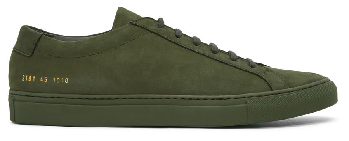

In [9]:
get_input_product('192133M237074')

In [10]:
def get_similar_product(sku_number, sim_matrix):
    
    index = product_df[product_df.sku == sku_number].index[0]
    
    
    print('OUTPUT:')
    
    count = 1
    for i in list(pd.Series(sim_matrix[index]).sort_values(ascending = False)[1:4].index):
    
        response = requests.get(product_df['image'][i])
        img = Image.open(BytesIO(response.content))
    
        print(f'PRODUCT {count}:')
        print(f"sku: {product_df['sku'][i]}")
        print(f"brand: {product_df['brand'][i]}")
        print(f"name: {product_df['name'][i]}")
        print(f"description: {product_df['description'][i]}")
        print(f"origin: {product_df['origin'][index]}")
        print(f"composition: {product_df['composition'][i]}")
        print(f"full price: {product_df['full-price'][i]}")
        print(f"sale price: {product_df['sale-price'][i]}")
        print(f"remaining sizes: {product_df['remaining-sizes'][i]}")
        
        plt.axis('off')
        plt.imshow(img)
        plt.show()
        
        count += 1

OUTPUT:
PRODUCT 1:
sku: 192133M237073
brand: Common Projects
name: SSENSE Exclusive Black Suede Achilles Sneakers
description: Low-top suede sneakers in black. Round toe. Tonal lace-up closure. Padded tongue. Signature series number stamp in gold-tone at outer side. Tonal treaded rubber sole. 

Available exclusively at SSENSE. 

Supplier color: Black
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 417
remaining sizes: ['39', '40', '41', '42', '43', '44', '45', '46', '47']


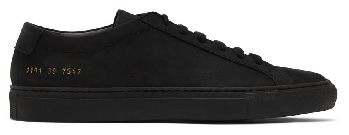

PRODUCT 2:
sku: 192133M237007
brand: Common Projects
name: Green Original Achilles Low Sneakers
description: Low-top buffed leather sneakers in green. Round toe. Tonal lace-up closure. Padded tongue and collar. Series number stamp in gold-tone at outer side. Tonal rubber sole.

Supplier color: Green
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 399
remaining sizes: ['39', '40', '41', '42', '43', '45']


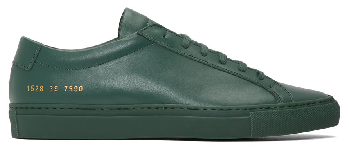

PRODUCT 3:
sku: 192133M237006
brand: Common Projects
name: Brown Achilles Low Sneakers
description: Low-top buffed leather sneakers in brown. Round toe. Tonal lace-up closure. Padded tongue. Signature series number stamp in gold-tone at outer heel. Tonal treaded rubber sole. 

Supplier color: Clay
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 369
remaining sizes: ['39', '40', '41', '42', '43', '44']


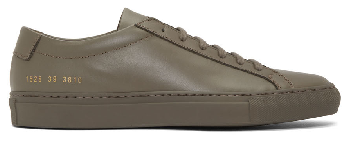

In [11]:
get_similar_product('192133M237074', cosine_sim)

In [12]:
def output_rec(sku_number, sim_matrix):
    
    get_input_product(sku_number)
    
    get_similar_product(sku_number, sim_matrix)

INPUT:
sku: 192128M213013
brand: Sunspel
name: White & Navy English Stripe T-Shirt
description: Short sleeve cotton jersey t-shirt striped in white and navy. Rib knit crewneck collar in navy. 

Supplier color: White /Navy
origin: United Kingdom
composition: 100% cotton.
full price: 135
sale price: 69
remaining sizes: ['XS', 'S', 'XL', 'XXL']


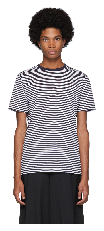

OUTPUT:
PRODUCT 1:
sku: 191128M213015
brand: Sunspel
name: White Classic T-Shirt
description: Short sleeve cotton jersey t-shirt in white. Rib knit crewneck collar. Tonal stitching.
origin: United Kingdom
composition: 100% cotton.
full price: 115
sale price: 61
remaining sizes: ['S', 'XXL']


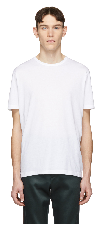

PRODUCT 2:
sku: 201128M213018
brand: Sunspel
name: White Cotton Classic T-Shirt
description: Short sleeve cotton jersey t-shirt in white. Crewneck collar. 

Supplier color: White
origin: United Kingdom
composition: 100% cotton.
full price: 100
sale price: 100
remaining sizes: ['XS', 'S', 'M', 'L', 'XL']


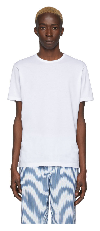

PRODUCT 3:
sku: 192191M213002
brand: Bianca Saunders
name: White Roll Up T-Shirt
description: Long sleeve heavyweight cotton jersey t-shirt in white. Rib knit crewneck collar. Hand-pleated detailing at hem. 

Supplier color: White
origin: United Kingdom
composition: 100% cotton.
full price: 300
sale price: 123
remaining sizes: ['XS', 'S']


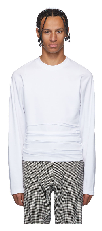

In [13]:
output_rec('192128M213013', cosine_sim)

INPUT:
sku: 201071M133119
brand: Dior Homme
name: Black Technicity06F Glasses
description: Rectangular acetate optical glasses in black. Hardware at face. Integrated nose pads. Logo engraved at bridge and metal hinges. Silver-tone hardware. Size: 55.17 150.

Logo-embossed leather case with tab-slot fastening included.

Supplier color: Black
origin: Italy
composition: Acetate, metal.
full price: 555
sale price: 555
remaining sizes: ['UNI']


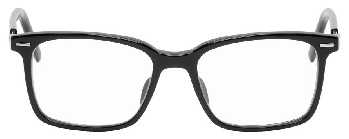

OUTPUT:
PRODUCT 1:
sku: 201071M133116
brand: Dior Homme
name: Black Diordisappear01 Glasses
description: Round optical glasses in matte black acetate and silver-tone metal. Hardware at face. Engraved logo at bridge. Transparent rubber nose pads. Cut-out at temple tips. Size: 49.22 150.

Logo-embossed leather case with tab-slot fastening included.

Supplier color: Matte black
origin: Italy
composition: Acetate, metal.
full price: 525
sale price: 525
remaining sizes: ['UNI']


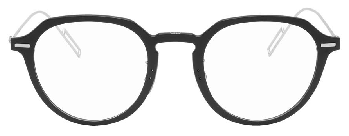

PRODUCT 2:
sku: 192071M133161
brand: Dior Homme
name: Black Dior216 Glasses
description: Round optical glasses in black acetate and silver-tone metal. Transparent rubber nose pads. Logo engraved at bridge and temples. Transparent acetate temple tips. Size: 47.23 150.

Leather case with tab-slot fastening included.

Supplier color: Black
origin: Italy
composition: Metal, acetate.
full price: 655
sale price: 314
remaining sizes: ['UNI']


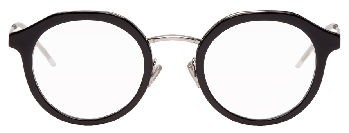

PRODUCT 3:
sku: 201071M133130
brand: Dior Homme
name: Black DiorComposit01 Glasses
description: Round metal-frame optical glasses matte black. Hardware detailing in silver-tone at face. Engraved silver-tone logo at double bridge and temples. Transparent rubber nose pads. Red trim at tonal acetate temple tips. Size: 54.19 150.

Logo-embossed leather case with magnetic fastening included.

Supplier color: Black/Palladium
origin: Italy
composition: Metal, acetate.
full price: 655
sale price: 655
remaining sizes: ['UNI']


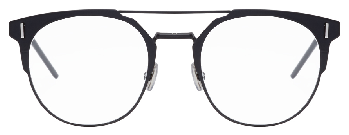

In [14]:
output_rec('201071M133119', cosine_sim)

INPUT:
sku: 182645M180001
brand: Gosha Rubchinskiy
name: Green Camo Hybrid Jacket
description: Long sleeve cotton and nylon-blend ripstop jacket featuring camouflage pattern in tones of green and brown. Spread collar. Button closure at front. Buttoned cinch tab and padding at shoulders. Flap pocket and welt pocket featuring black loop Velcro appliqué at chest. Flap pockets at waist. Three-button surgeon's cuffs. Central vent at back hem. Cupro lining in black. Tonal stitching.
origin: Imported
composition: Body: 70% cotton, 30% polyamide. Lining: 100% cupro.
full price: 1070
sale price: 385
remaining sizes: ['M', 'XL']


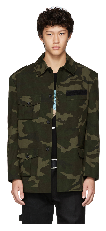

OUTPUT:
PRODUCT 1:
sku: 191607M180005
brand: Off-White
name: Black Windbreaker Jacket
description: Long sleeve nylon jacket in black. Drawstring featuring text printed in green at hood. Zip closure at front. Logo printed in white and zippered pocket at chest. Zippered pockets at waist. Elasticized cuffs. Bungee-style drawstring at hem. Text printed in white at back. Patch pocket and logo patch at interior. Tonal hardware. Tonal stitching.
origin: Imported
composition: 100% polyamide.
full price: 1470
sale price: 794
remaining sizes: ['XL']


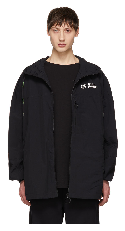

PRODUCT 2:
sku: 192539M178005
brand: Marcelo Burlon County of Milan
name: Purple Down Jacket
description: Long sleeve down-filled quilted hooded jacket in purple coated nylon satin and black nylon canvas. Zip closure at front. Zip pocket and rubberized logo appliqué at chest. Zippered pockets at waist. Bungee-style drawstring at hem. Adjustable Velcro straps at cuffs. Zippered pocket at interior. Satin lining in black. Black hardware. 

Fill: 70% down, 30% feathers. 

Supplier color: Dark Purple
origin: Imported
composition: Body 1: 100% polyamide. Body 2: 100% polyamide. Lining 1: 100% polyamide. Lining 2: 100% cotton. Trim: 100% polyamide.
full price: 1355
sale price: 745
remaining sizes: ['XL']


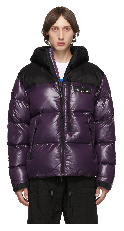

PRODUCT 3:
sku: 191184M177002
brand: Sankuanz
name: Black Denim Stonewashed Jacket
description: Long sleeve non-stretch denim jacket in black. Fading throughout. Spread collar. Button closure at front. Buttoned flap pockets at chest. Welt pockets at waist. Adjustable buttoned tab at back hem. Tonal logo embroidered at back. Single-button barrel cuffs. Green and gunmetal-tone hardware.
origin: Imported
composition: 100% cotton.
full price: 920
sale price: 322
remaining sizes: ['M']


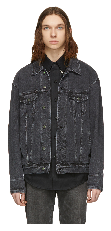

In [15]:
output_rec('182645M180001', cosine_sim)

## 2/ EUCLIDEAN DISTANCES

In [16]:
euc_dist = euclidean_distances(product_matrix)

In [17]:
print(euc_dist)

[[0.         3.1919467  2.8611435  ... 3.63268507 4.14856251 4.22074547]
 [3.1919467  0.         1.41531161 ... 4.27742726 5.05923815 4.97820339]
 [2.8611435  1.41531161 0.         ... 4.03660523 4.85733042 4.97798161]
 ...
 [3.63268507 4.27742726 4.03660523 ... 0.         3.64040352 3.70577951]
 [4.14856251 5.05923815 4.85733042 ... 3.64040352 0.         3.74709263]
 [4.22074547 4.97820339 4.97798161 ... 3.70577951 3.74709263 0.        ]]


In [18]:
def get_similar_product_2(sku_number, dist_matrix):
    
    index = product_df[product_df.sku == sku_number].index[0]
    
    
    print('OUTPUT:')
    
    count = 1
    for i in list(pd.Series(dist_matrix[index]).sort_values(ascending = True)[1:4].index):
    
        response = requests.get(product_df['image'][i])
        img = Image.open(BytesIO(response.content))
    
        print(f'PRODUCT {count}:')
        print(f"sku: {product_df['sku'][i]}")
        print(f"brand: {product_df['brand'][i]}")
        print(f"name: {product_df['name'][i]}")
        print(f"description: {product_df['description'][i]}")
        print(f"origin: {product_df['origin'][index]}")
        print(f"composition: {product_df['composition'][i]}")
        print(f"full price: {product_df['full-price'][i]}")
        print(f"sale price: {product_df['sale-price'][i]}")
        print(f"remaining sizes: {product_df['remaining-sizes'][i]}")
        
        plt.axis('off')
        plt.imshow(img)
        plt.show()
        
        count += 1

In [19]:
def output_rec_2(sku_number, dist_matrix):
    
    get_input_product(sku_number)
    
    get_similar_product_2(sku_number, dist_matrix)

INPUT:
sku: 201071M133119
brand: Dior Homme
name: Black Technicity06F Glasses
description: Rectangular acetate optical glasses in black. Hardware at face. Integrated nose pads. Logo engraved at bridge and metal hinges. Silver-tone hardware. Size: 55.17 150.

Logo-embossed leather case with tab-slot fastening included.

Supplier color: Black
origin: Italy
composition: Acetate, metal.
full price: 555
sale price: 555
remaining sizes: ['UNI']


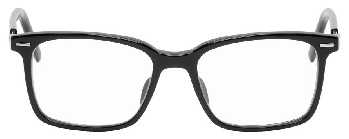

OUTPUT:
PRODUCT 1:
sku: 201071M133116
brand: Dior Homme
name: Black Diordisappear01 Glasses
description: Round optical glasses in matte black acetate and silver-tone metal. Hardware at face. Engraved logo at bridge. Transparent rubber nose pads. Cut-out at temple tips. Size: 49.22 150.

Logo-embossed leather case with tab-slot fastening included.

Supplier color: Matte black
origin: Italy
composition: Acetate, metal.
full price: 525
sale price: 525
remaining sizes: ['UNI']


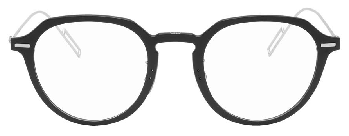

PRODUCT 2:
sku: 192071M133161
brand: Dior Homme
name: Black Dior216 Glasses
description: Round optical glasses in black acetate and silver-tone metal. Transparent rubber nose pads. Logo engraved at bridge and temples. Transparent acetate temple tips. Size: 47.23 150.

Leather case with tab-slot fastening included.

Supplier color: Black
origin: Italy
composition: Metal, acetate.
full price: 655
sale price: 314
remaining sizes: ['UNI']


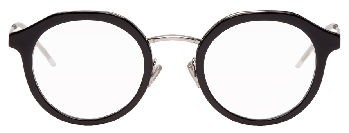

PRODUCT 3:
sku: 201071M133115
brand: Dior Homme
name: Transparent Diordisappear01 Glasses
description: Round optical glasses in transparent acetate and silver-tone metal. Hardware at face. Engraved logo at bridge. Transparent rubber nose pads. Cut-out at temple tips. Size: 49.22 150.

Logo-embossed leather case with tab-slot fastening included.

Supplier color: Crystal
origin: Italy
composition: Acetate, metal.
full price: 525
sale price: 525
remaining sizes: ['UNI']


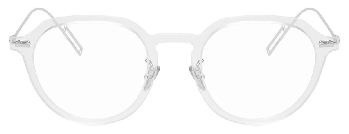

In [20]:
output_rec_2('201071M133119', euc_dist)

INPUT:
sku: 192128M213013
brand: Sunspel
name: White & Navy English Stripe T-Shirt
description: Short sleeve cotton jersey t-shirt striped in white and navy. Rib knit crewneck collar in navy. 

Supplier color: White /Navy
origin: United Kingdom
composition: 100% cotton.
full price: 135
sale price: 69
remaining sizes: ['XS', 'S', 'XL', 'XXL']


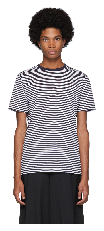

OUTPUT:
PRODUCT 1:
sku: 191128M213015
brand: Sunspel
name: White Classic T-Shirt
description: Short sleeve cotton jersey t-shirt in white. Rib knit crewneck collar. Tonal stitching.
origin: United Kingdom
composition: 100% cotton.
full price: 115
sale price: 61
remaining sizes: ['S', 'XXL']


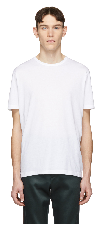

PRODUCT 2:
sku: 201128M213018
brand: Sunspel
name: White Cotton Classic T-Shirt
description: Short sleeve cotton jersey t-shirt in white. Crewneck collar. 

Supplier color: White
origin: United Kingdom
composition: 100% cotton.
full price: 100
sale price: 100
remaining sizes: ['XS', 'S', 'M', 'L', 'XL']


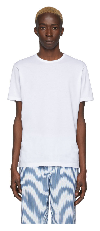

PRODUCT 3:
sku: 192195M213012
brand: Casablanca
name: SSENSE Exclusive White Champagne & Cigars T-Shirt
description: Short sleeve cotton jersey t-shirt in white. Rib knit crewneck collar. Multicolor graphic printed at chest.

Available exclusively at SSENSE.

Supplier color: White
origin: United Kingdom
composition: 100% cotton.
full price: 120
sale price: 100
remaining sizes: ['XS', 'S']


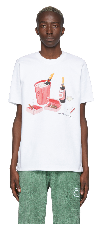

In [21]:
output_rec_2('192128M213013', euc_dist)

INPUT:
sku: 192133M237074
brand: Common Projects
name: SSENSE Exclusive Green Suede Achilles Sneakers
description: Lop-top suede sneakers in green. Round toe. Tonal lace-up closure. Padded tongue and collar. Signature series number stamped in gold-tone at sides. Tonal treaded rubber sole.

Available exclusively at SSENSE.

Supplier color: Olive
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 345
remaining sizes: ['39', '40', '41', '42', '43', '44', '46', '47']


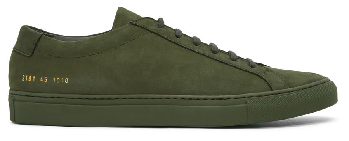

OUTPUT:
PRODUCT 1:
sku: 192133M237073
brand: Common Projects
name: SSENSE Exclusive Black Suede Achilles Sneakers
description: Low-top suede sneakers in black. Round toe. Tonal lace-up closure. Padded tongue. Signature series number stamp in gold-tone at outer side. Tonal treaded rubber sole. 

Available exclusively at SSENSE. 

Supplier color: Black
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 417
remaining sizes: ['39', '40', '41', '42', '43', '44', '45', '46', '47']


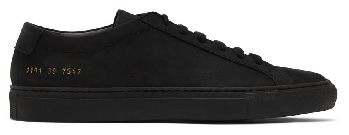

PRODUCT 2:
sku: 192133M237006
brand: Common Projects
name: Brown Achilles Low Sneakers
description: Low-top buffed leather sneakers in brown. Round toe. Tonal lace-up closure. Padded tongue. Signature series number stamp in gold-tone at outer heel. Tonal treaded rubber sole. 

Supplier color: Clay
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 595
sale price: 369
remaining sizes: ['39', '40', '41', '42', '43', '44']


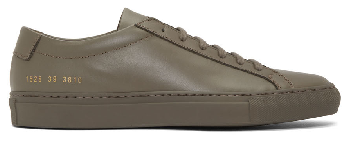

PRODUCT 3:
sku: 192133M237008
brand: Common Projects
name: Tan Achilles Low Sneakers
description: Low-top buffed leather sneakers in tan. Round toe. Tonal lace-up closure. Padded tongue. Signature series number stamp in gold-tone at outer heel. Tonal treaded rubber sole. 

Supplier color: Tan
origin: Italy
composition: Upper: leather. Sole: rubber.
full price: 590
sale price: 389
remaining sizes: ['39', '40', '41', '42', '43', '46']


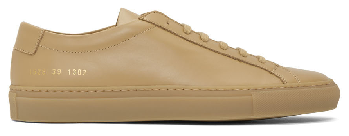

In [22]:
output_rec_2('192133M237074', euc_dist)

INPUT:
sku: 182645M180001
brand: Gosha Rubchinskiy
name: Green Camo Hybrid Jacket
description: Long sleeve cotton and nylon-blend ripstop jacket featuring camouflage pattern in tones of green and brown. Spread collar. Button closure at front. Buttoned cinch tab and padding at shoulders. Flap pocket and welt pocket featuring black loop Velcro appliqué at chest. Flap pockets at waist. Three-button surgeon's cuffs. Central vent at back hem. Cupro lining in black. Tonal stitching.
origin: Imported
composition: Body: 70% cotton, 30% polyamide. Lining: 100% cupro.
full price: 1070
sale price: 385
remaining sizes: ['M', 'XL']


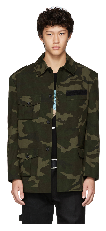

OUTPUT:
PRODUCT 1:
sku: 191184M177002
brand: Sankuanz
name: Black Denim Stonewashed Jacket
description: Long sleeve non-stretch denim jacket in black. Fading throughout. Spread collar. Button closure at front. Buttoned flap pockets at chest. Welt pockets at waist. Adjustable buttoned tab at back hem. Tonal logo embroidered at back. Single-button barrel cuffs. Green and gunmetal-tone hardware.
origin: Imported
composition: 100% cotton.
full price: 920
sale price: 322
remaining sizes: ['M']


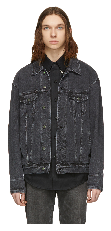

PRODUCT 2:
sku: 191358M180004
brand: Dries Van Noten
name: Black Vignola Jacket
description: Long sleeve cotton canvas jacket in black. Spread collar. Concealed button closure at front. Flap pockets at chest. Welt pockets at waist. Pleats at hem. Single-button barrel cuffs. Patch pocket at interior. Unlined.
origin: Imported
composition: 100% cotton.
full price: 750
sale price: 443
remaining sizes: ['M']


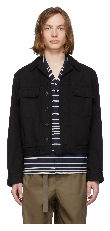

PRODUCT 3:
sku: 192539M178005
brand: Marcelo Burlon County of Milan
name: Purple Down Jacket
description: Long sleeve down-filled quilted hooded jacket in purple coated nylon satin and black nylon canvas. Zip closure at front. Zip pocket and rubberized logo appliqué at chest. Zippered pockets at waist. Bungee-style drawstring at hem. Adjustable Velcro straps at cuffs. Zippered pocket at interior. Satin lining in black. Black hardware. 

Fill: 70% down, 30% feathers. 

Supplier color: Dark Purple
origin: Imported
composition: Body 1: 100% polyamide. Body 2: 100% polyamide. Lining 1: 100% polyamide. Lining 2: 100% cotton. Trim: 100% polyamide.
full price: 1355
sale price: 745
remaining sizes: ['XL']


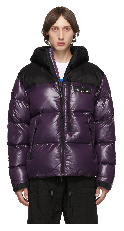

In [23]:
output_rec_2('182645M180001', euc_dist)